# Participante: Victor Armando Jaramillo Moreno

# Digits dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA

In [35]:
data = load_digits()
X,Y = load_digits(return_X_y = True)
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [36]:
X.shape

pca = PCA(n_components = 2)
pca_ = PCA()
X_pca = pca.fit_transform(X)
x_pca_ = pca_.fit_transform(X)
X_pca.shape

(1797, 2)

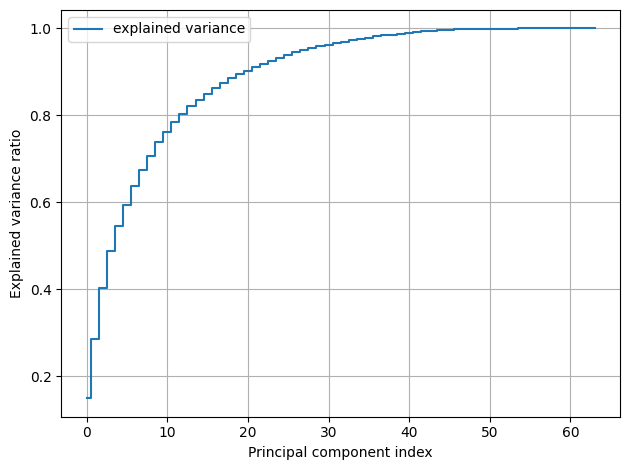

In [37]:
exp_var_pca = pca_.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\victor\AppData\Local\Temp\ipykernel_15812\1081964598.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.6)


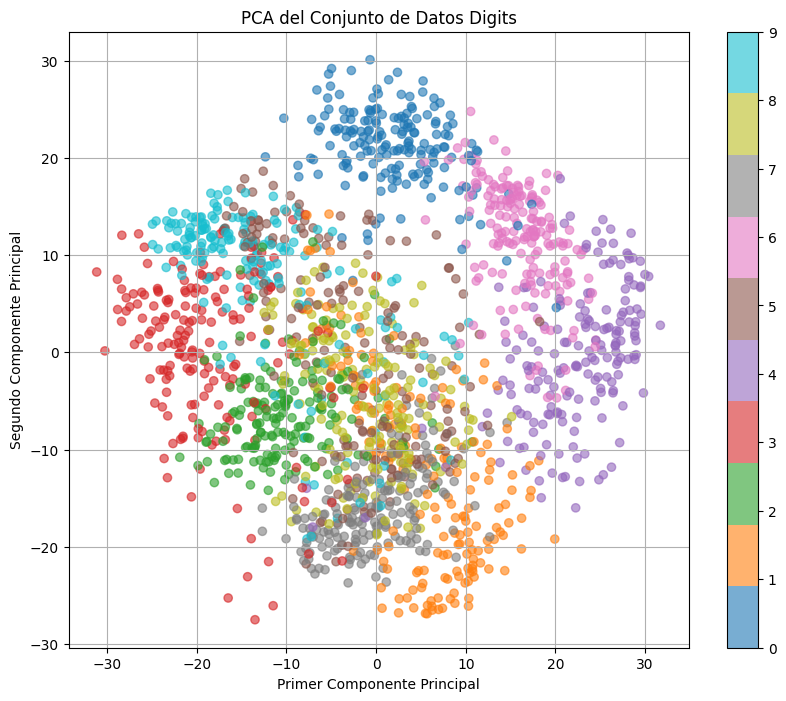

Varianza explicada por el primer componente: 14.89%
Varianza explicada por el segundo componente: 13.62%


In [38]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.6)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA del Conjunto de Datos Digits')
plt.grid()
plt.show()

print(f"Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]*100:.2f}%")

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_lda = lda.fit_transform(X,Y)

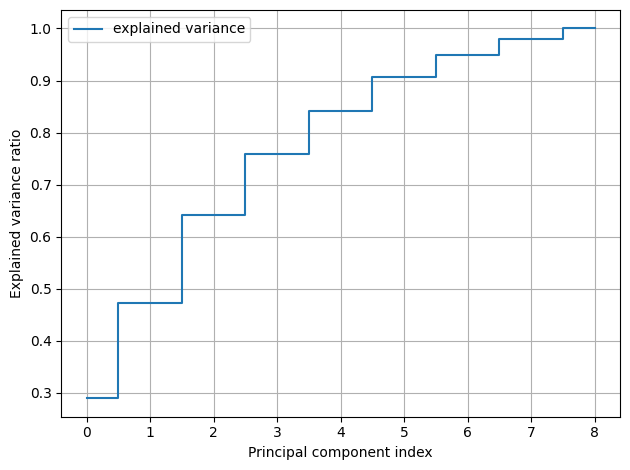

In [40]:
exp_var_lda = lda.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_lda)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

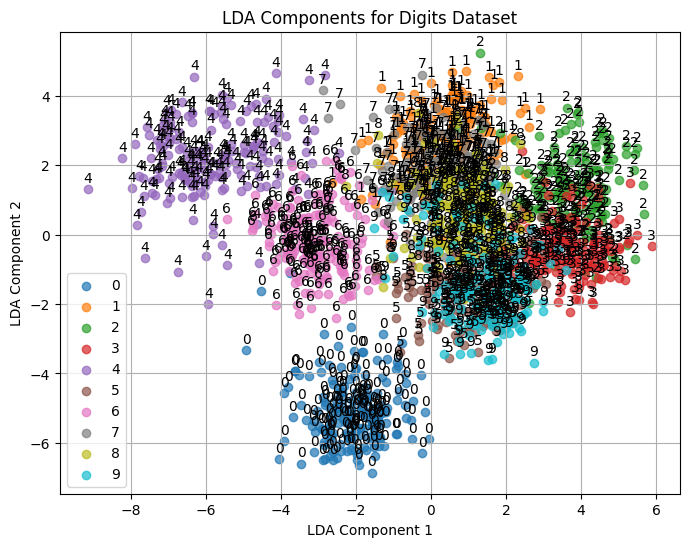

Explained variance ratio of each component:
[0.28912041 0.18262788 0.16962345 0.1167055  0.08301253 0.06565685
 0.04310127 0.0293257  0.0208264 ]


In [45]:
# Plot the LDA components
plt.figure(figsize=(8, 6))
for label in range(10):
    plt.scatter(X_lda[Y == label, 0], X_lda[Y == label, 1], label=str(label), alpha=0.7)
for i in range(len(X_lda)):
    plt.annotate(str(Y[i]), (X_lda[i, 0], X_lda[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Components for Digits Dataset')
plt.legend()
plt.grid()
plt.show()

# Print the explained variance ratio
print("Explained variance ratio of each component:")
print(lda.explained_variance_ratio_)